# Multiple Exercises Detection

## Why?

We noticed that 2 categories contained fewer files than the other 2 categories.       
We thus noticed that the 2 categories that contained fewer files were composed of a file containing 2 or 3 exercises in one file.       
We decided to split the files to have like the 2 other categories one exercise per file.

## How?

In [1]:
# We import pandas
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Open & Read the file
df = pd.read_csv('./data/file-with-multiple-exercises.csv', header=None)

# labels
labels = ["thorax_r_x", "thorax_r_y", "thorax_r_z",
          "clavicula_r_x", "clavicula_r_y", "clavicula_r_z",
          "scapula_r_x", "scapula_r_y", "scapula_r_z",
          "humerus_r_x", "humerus_r_y", "humerus_r_z",
          "ellebooghoek_r_x", "ellebooghoek_r_y", "ellebooghoek_r_z",
          "thorax_l_x", "thorax_l_y", "thorax_l_z",
          "clavicula_l_x", "clavicula_l_y", "clavicula_l_z",
          "scapula_l_x", "scapula_l_y", "scapula_l_z",
          "humerus_l_x", "humerus_l_y", "humerus_l_z",
          "ellebooghoek_l_x", "ellebooghoek_l_y", "ellebooghoek_l_z"]

# labels to remove
labels_to_remove = ["ellebooghoek_r_x", "ellebooghoek_r_y", "ellebooghoek_r_z",
                    "ellebooghoek_l_x", "ellebooghoek_l_y", "ellebooghoek_l_z"]

# Set columns header
df = df.rename(columns={index: k for index, k in enumerate(labels)})

# Remove elbow angles
df = df.drop(['ellebooghoek_r_x', 'ellebooghoek_r_y', 'ellebooghoek_r_z', 'ellebooghoek_l_x', 'ellebooghoek_l_y', 'ellebooghoek_l_z'], axis=1)

# Remove labels we don't want
for label_to_remove in labels_to_remove:
    labels.remove(label_to_remove)

# Print head of the file
df.head()

,thorax_r_x,thorax_r_y,thorax_r_z,clavicula_r_x,clavicula_r_y,clavicula_r_z,scapula_r_x,scapula_r_y,scapula_r_z,humerus_r_x,...,thorax_l_z,clavicula_l_x,clavicula_l_y,clavicula_l_z,scapula_l_x,scapula_l_y,scapula_l_z,humerus_l_x,humerus_l_y,humerus_l_z
0,7.319768,14.97475,4.694595,-39.24555,-0.023814,-9.639053,9.545686,3.717552,-5.716809,-68.43949,...,-4.694595,-12.20165,11.95861,-5.534398,29.31716,7.272611,-17.49078,-5.768973,13.93478,14.28152
1,7.319768,14.97475,4.694595,-39.57803,0.179924,-9.639058,9.339948,3.649325,-5.813426,-68.05222,...,-4.694595,-12.39975,12.14418,-5.493342,29.42773,7.803331,-17.62956,-5.682439,14.00733,14.19795
2,7.319768,14.97475,4.694595,-39.65306,0.046747,-9.638976,9.339948,3.649325,-5.813426,-67.17662,...,-4.694595,-12.24451,12.14234,-5.525542,29.42773,7.803331,-17.62956,-5.682439,14.00733,14.19795
3,7.319768,14.97475,4.694595,-39.65306,0.046747,-9.638976,9.339948,3.649325,-5.813426,-67.57061,...,-4.694595,-12.38461,12.15405,-5.496487,29.42773,7.803331,-17.62956,-5.683333,14.00710,14.19879
4,7.319768,14.97475,4.694595,-39.69055,-0.108662,-9.638981,9.545686,3.717552,-5.716809,-67.20664,...,-4.694595,-12.27811,11.83510,-5.518564,29.42862,7.292298,-17.49643,-5.643474,14.34953,12.89158


kdsjl

<IPython.core.display.Javascript object>


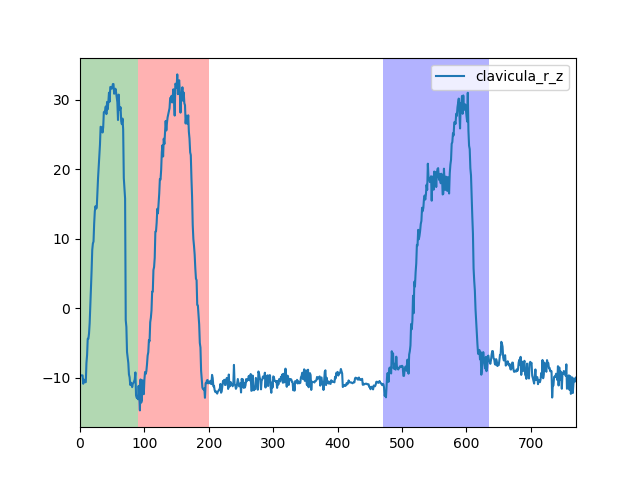

In [20]:
# Display one axis of one bone
ax = df.plot(y='clavicula_r_z')

# Display movement area
ax.axvspan(0, 90, facecolor='g', alpha=0.3)
ax.axvspan(200, 90, facecolor='r', alpha=0.3)
ax.axvspan(470, 635, facecolor='b', alpha=0.3)

# Lifting

/!\ Expliquer pourquoi ces utiles :)

<IPython.core.display.Javascript object>


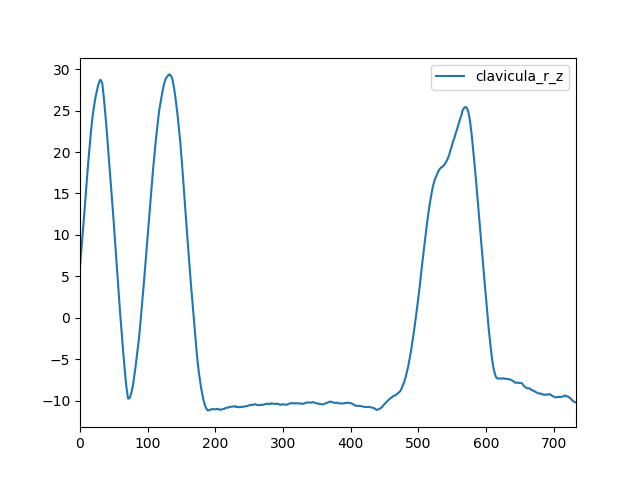

In [41]:
def lift_data(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

lifted_df = pd.DataFrame()
for bone in df:
    lifted_df[bone] = lift_data(np.array(df[bone]), int(len(df[bone]) * 0.05))
    
lifted_df.plot(y='clavicula_r_z')

# Extract variations